imports

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# spd (Statistical Parity Difference)

analyse

In [46]:
def spd(model):
    df = pd.read_csv(f"data/prediction_with_{model}.csv")
    # for is_recid
    
    
    #for race
    df['protected_attr_race'] = df['race'].apply(lambda x: 0 if x == 'Caucasian' else 1)
    #rate of is_recid  for protected group
    protected_race_rate_is_recid = (df[df["protected_attr_race"] == 1]["is_recid"] == 0).mean()
    #rate of is_recid  for unprotected group
    unprotected_race_rate_is_recid  = (df[df["protected_attr_race"] == 0]["is_recid"] == 0).mean()
    #spd
    race_spd_is_recid  = protected_race_rate_is_recid  - unprotected_race_rate_is_recid 
    if race_spd_is_recid > 0:
        analyse_race_is_recid = "The model is biased against the protected group"
    elif race_spd_is_recid == 0:
        analyse_race_is_recid = "The model is not biased"
    else:
        analyse_race_is_recid = "The model is biased against the unprotected group"
    # print(f"Spd for race : {race_spd_is_recid } for is_recid \n {analyse_race_is_recid}")
    
    
    #for sex
    df['protected_attr_sex'] = df['sex'].apply(lambda x: 0 if x == 'Male' else 1)
    #rate of is_recid  for protected group
    protected_sex_rate_is_recid  = (df[df["protected_attr_sex"] == 1]["is_recid"] == 0).mean()
    #rate of is_recid  for unprotected group
    unprotected_sex_rate_is_recid  = (df[df["protected_attr_sex"] == 0]["is_recid"] == 0).mean()
    #spd
    sex_spd_is_recid  = protected_sex_rate_is_recid  - unprotected_sex_rate_is_recid 
    if sex_spd_is_recid > 0:
        analyse_sex_is_recid = "The model is biased against the protected group"
    elif sex_spd_is_recid == 0:
        analyse_sex_is_recid = "The model is not biased"
    else:
        analyse_sex_is_recid = "The model is biased against the unprotected group"
    # print(f"Spd for sex : {sex_spd_is_recid } for is_recid \n {analyse_sex_is_recid}")
    
    
    
    #for prediction
    
    
    #for race
    
    
    #rate of prediction  for protected group
    protected_race_rate_prediction = (df[df["protected_attr_race"] == 1]["prediction"]== 0).mean()
    #rate of prediction  for unprotected group
    unprotected_race_rate_prediction  = (df[df["protected_attr_race"] ==0]["prediction"]==0).mean()
    #spd
    race_spd_prediction = protected_race_rate_prediction  - unprotected_race_rate_prediction
    if race_spd_prediction> 0:
        analyse_race_prediction= "The model is biased against the protected group"
    elif race_spd_prediction == 0:
        analyse_race_prediction = "The model is not biased"
    else:
        analyse_race_prediction = "The model is biased against the unprotected group"
    # print(f"Spd for race : {race_spd_prediction } for prediction \n {analyse_race_prediction}")
    
    
    #for sex
    #rate of prediction  for protected group
    protected_sex_rate_prediction  = (df[df["protected_attr_sex"] == 1]["prediction"]==0).mean()
    #rate of prediction  for unprotected group
    unprotected_sex_rate_prediction  = (df[df["protected_attr_sex"] ==0]["prediction"]==0).mean()
    #spd
    sex_spd_prediction  = protected_sex_rate_prediction  - unprotected_sex_rate_prediction
    if sex_spd_prediction > 0:
        analyse_sex_prediction = "The model is biased against the protected group"
    elif sex_spd_prediction == 0:
        analyse_sex_prediction= "The model is not biased"
    else:
        analyse_sex_prediction = "The model is biased against the unprotected group"
    # print(f"Spd for sex : {sex_spd_prediction} for prediction \n {analyse_sex_prediction}")
    
    
    answer = {'race_spd_is_recid': race_spd_is_recid,
              'sex_spd_is_recid':sex_spd_is_recid,
              'race_spd_prediction':race_spd_prediction,
              'sex_spd_prediction':sex_spd_prediction}
    return answer


plot spd

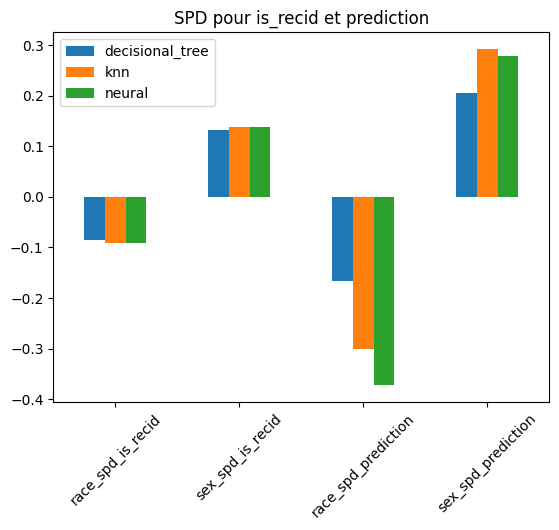

In [47]:
def plot_spd():
    methods = ["decisional_tree","knn","neural"]
    infos = {}
    for method in methods:
        infos[method] = spd(method)
    df = pd.DataFrame(infos)
    df.plot(kind='bar',rot=45)
    plt.title("SPD pour is_recid et prediction")
    plt.show()
   
plot_spd() 

# di (Disparate impact)

analyse

In [48]:
def di(model):
    df = pd.read_csv(f"data/prediction_with_{model}.csv")
    
    # for is_recid
    
    
    #for race
    df['protected_attr_race'] = df['race'].apply(lambda x: 0 if x == 'Caucasian' else 1)
    #rate of is_recid  for protected group
    protected_race_rate_is_recid = (df[df["protected_attr_race"] == 1]["is_recid"] == 0).mean()
    #rate of is_recid  for unprotected group
    unprotected_race_rate_is_recid  = (df[df["protected_attr_race"] == 0]["is_recid"] == 0).mean()
    #di
    race_di_is_recid  = protected_race_rate_is_recid / unprotected_race_rate_is_recid 
    if race_di_is_recid > 1:
        analyse_race_is_recid = "The model is biased against the protected group"
    elif race_di_is_recid == 1:
        analyse_race_is_recid = "The model is not biased"
    else:
        analyse_race_is_recid = "The model is biased against the unprotected group"
    # print(f"Di for race : {race_di_is_recid } for is_recid \n {analyse_race_is_recid}")
    
    
    #for sex
    df['protected_attr_sex'] = df['sex'].apply(lambda x: 0 if x == 'Male' else 1)
    #rate of is_recid  for protected group
    protected_sex_rate_is_recid  = (df[df["protected_attr_sex"] == 1]["is_recid"] == 0).mean()
    #rate of is_recid  for unprotected group
    unprotected_sex_rate_is_recid  = (df[df["protected_attr_sex"] == 0]["is_recid"] == 0).mean()
    #di
    sex_di_is_recid  = protected_sex_rate_is_recid  / unprotected_sex_rate_is_recid 
    if sex_di_is_recid > 1:
        analyse_sex_is_recid = "The model is biased against the protected group"
    elif sex_di_is_recid == 1:
        analyse_sex_is_recid = "The model is not biased"
    else:
        analyse_sex_is_recid = "The model is biased against the unprotected group"
    # print(f"di for sex : {sex_di_is_recid } for is_recid \n {analyse_sex_is_recid}")
    
    
    
    #for prediction
    
    
    #for race
    
    
    #rate of prediction  for protected group
    protected_race_rate_prediction = (df[df["protected_attr_race"] == 1]["prediction"]== 0).mean()
    #rate of prediction  for unprotected group
    unprotected_race_rate_prediction  = (df[df["protected_attr_race"] ==0]["prediction"]==0).mean()
    #di
    race_di_prediction = protected_race_rate_prediction  / unprotected_race_rate_prediction
    if race_di_prediction> 1:
        analyse_race_prediction= "The model is biased against the protected group"
    elif race_di_prediction == 1:
        analyse_race_prediction = "The model is not biased"
    else:
        analyse_race_prediction = "The model is biased against the unprotected group"
    # print(f"Di for race : {race_di_prediction } for prediction \n {analyse_race_prediction}")
    
    
    #for sex
    #rate of prediction  for protected group
    protected_sex_rate_prediction  = (df[df["protected_attr_sex"] == 1]["prediction"]==0).mean()
    #rate of prediction  for unprotected group
    unprotected_sex_rate_prediction  = (df[df["protected_attr_sex"] ==0]["prediction"]==0).mean()
    #di
    sex_di_prediction  = protected_sex_rate_prediction  / unprotected_sex_rate_prediction
    if sex_di_prediction > 1:
        analyse_sex_prediction = "The model is biased against the protected group"
    elif sex_di_prediction == 1:
        analyse_sex_prediction= "The model is not biased"
    else:
        analyse_sex_prediction = "The model is biased against the unprotected group"
    # print(f"Di for sex : {sex_di_prediction} for prediction \n {analyse_sex_prediction}")
    
    
    answer = {'race_di_is_recid': race_di_is_recid,
              'sex_di_is_recid':sex_di_is_recid,
              'race_di_prediction':race_di_prediction,
              'sex_di_prediction':sex_di_prediction}
    return answer
    

    

plot_di

{'race_di_is_recid': 0.8617510587564466, 'sex_di_is_recid': 1.249667058428664, 'race_di_prediction': 0.7675850651850424, 'sex_di_prediction': 1.364945992046976}
{'race_di_is_recid': 0.8617510587564466, 'sex_di_is_recid': 1.249667058428664, 'race_di_prediction': 0.7675850651850424, 'sex_di_prediction': 1.364945992046976}
{'race_di_is_recid': 0.851291177132061, 'sex_di_is_recid': 1.264320605076368, 'race_di_prediction': 0.6252722884378092, 'sex_di_prediction': 1.5314848726588082}
{'race_di_is_recid': 0.851291177132061, 'sex_di_is_recid': 1.264320605076368, 'race_di_prediction': 0.6252722884378092, 'sex_di_prediction': 1.5314848726588082}
{'race_di_is_recid': 0.851291177132061, 'sex_di_is_recid': 1.264320605076368, 'race_di_prediction': 0.5434048347488744, 'sex_di_prediction': 1.5398255226399944}
{'race_di_is_recid': 0.851291177132061, 'sex_di_is_recid': 1.264320605076368, 'race_di_prediction': 0.5434048347488744, 'sex_di_prediction': 1.5398255226399944}


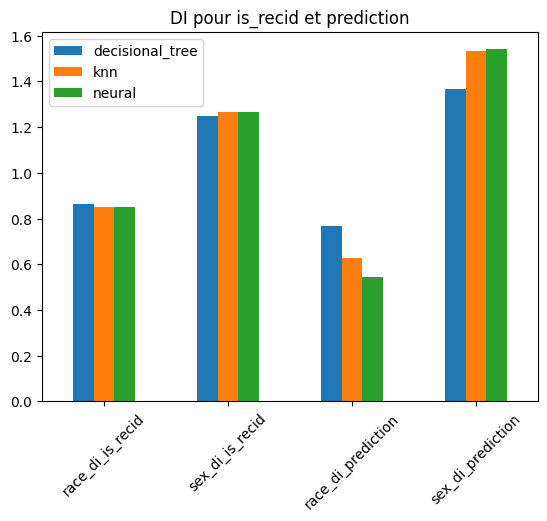

In [49]:
def plot_di():
    methods = ["decisional_tree","knn","neural"]
    infos = {}
    for method in methods:
        infos[method] = di(method)
        print(infos[method])
        for key,value in infos[method].items():
            infos[method][key] = value
        print(infos[method])
   
    df = pd.DataFrame(infos)
    df.plot(kind='bar',rot=45)
    plt.title("DI pour is_recid et prediction")
    plt.show()
    
plot_di()

# EOD (Equal Opportunity Difference)

analyse

In [50]:
def eod(model):
    df = pd.read_csv(f"data/prediction_with_{model}.csv")
    # we compare the predictions with the is_recid column
    
    df['protected_attr_sex'] = df['sex'].apply(lambda x: 0 if x == 'Male' else 1)
    df['protected_attr_race'] = df['race'].apply(lambda x: 0 if x == 'Caucasian' else 1)
    
    #true positive  for protected group (race)
    protected_race_tp= df[(df["protected_attr_race"]== 1 ) & (df["prediction"]== 0) & (df["is_recid"]== 0)].shape[0]
    #total positive for protected group (race)
    protected_race_p = df[(df["protected_attr_race"]== 1 ) & (df["is_recid"]== 0)].shape[0]
    #true positive rate for protected group (race)
    protected_race_tpr = protected_race_tp/protected_race_p
    
    #same for unprotected group (race)
    unprotected_race_tp= df[(df["protected_attr_race"]== 0 ) & (df["prediction"]== 0) & (df["is_recid"]== 0)].shape[0]
    unprotected_race_p = df[(df["protected_attr_race"]== 0 ) & (df["is_recid"]== 0)].shape[0]
    unprotected_race_tpr = unprotected_race_tp/unprotected_race_p
    
    # print(protected_race_tpr,unprotected_race_tpr)
    eod_race = protected_race_tpr - unprotected_race_tpr
    
    
    # same for sex
    
    #true positive  for protected group (sex)
    protected_sex_tp= df[(df["protected_attr_sex"]== 1 ) & (df["prediction"]== 0) & (df["is_recid"]== 0)].shape[0]
    #total positive for protected group (sex)
    protected_sex_p = df[(df["protected_attr_sex"]== 1 ) & (df["is_recid"]== 0)].shape[0]
    #true positive rate for protected group (sex)
    protected_sex_tpr = protected_sex_tp/protected_sex_p
    
    #same for unprotected group (sex)
    unprotected_sex_tp= df[(df["protected_attr_sex"]== 0 ) & (df["prediction"]== 0) & (df["is_recid"]== 0)].shape[0]
    unprotected_sex_p = df[(df["protected_attr_sex"]== 0 ) & (df["is_recid"]== 0)].shape[0]
    unprotected_sex_tpr = unprotected_sex_tp/unprotected_sex_p
    
    eod_sex = protected_sex_tpr - unprotected_sex_tpr
    
    
    answer  = {"eod_race": eod_race, 
               "eod_sex": eod_sex}
    
    return answer
    
    
    
eod("decisional_tree")

{'eod_race': -0.11052376809038156, 'eod_sex': 0.1297661118904705}

plot eod

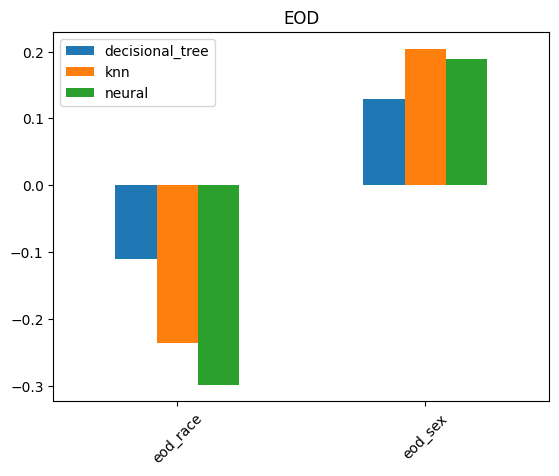

In [51]:
def plot_eod():
    methods = ["decisional_tree","knn","neural"]
    infos = {}
    for method in methods:
        infos[method] = eod(method)
    df = pd.DataFrame(infos)
    df.plot(kind='bar',rot=45)
    plt.title("EOD")
    plt.show()
    
plot_eod()

# JFI (Jain Fairness Index)

In [52]:
def get_jfi(target_variable, csv):
    df = pd.read_csv(f"./data/{csv}")
    class_proportions = df[target_variable].value_counts(normalize=True)
    shares = class_proportions.values
    jfi = shares.prod() ** (1 / len(shares))
    print("Jain's Fairness Index (JFI):", jfi)
    return jfi


def plot_jfi():

    jfi_is_recid = get_jfi("is_recid", "clean_data.csv")
    jfi_knn = get_jfi("prediction", "prediction_with_knn.csv")
    jfi_neural = get_jfi("prediction", "prediction_with_neural.csv")
    jfi_tree = get_jfi("prediction", "prediction_with_decisional_tree.csv")
    jfi_df = pd.DataFrame({
        'Model': ['Real Data', 'KNN', 'Neural Network', 'Decisional Tree'],
        'JFI': [jfi_is_recid, jfi_knn, jfi_neural, jfi_tree]
    })
    color_dict = {'Real Data': 'gray', 'KNN': 'orange', 'Neural Network': 'green', 'Decisional Tree': 'blue'}

    jfi_df.plot(kind='bar', x='Model', y='JFI', title='JFI par modèle',color=[color_dict[model] for model in jfi_df['Model']],legend=None,rot=45)
    plt.show()

{'race_di_is_recid': 0.8617510587564466, 'sex_di_is_recid': 1.249667058428664, 'race_di_prediction': 0.7675850651850424, 'sex_di_prediction': 1.364945992046976}
{'race_di_is_recid': 0.8617510587564466, 'sex_di_is_recid': 1.249667058428664, 'race_di_prediction': 0.7675850651850424, 'sex_di_prediction': 1.364945992046976}
{'race_di_is_recid': 0.851291177132061, 'sex_di_is_recid': 1.264320605076368, 'race_di_prediction': 0.6252722884378092, 'sex_di_prediction': 1.5314848726588082}
{'race_di_is_recid': 0.851291177132061, 'sex_di_is_recid': 1.264320605076368, 'race_di_prediction': 0.6252722884378092, 'sex_di_prediction': 1.5314848726588082}
{'race_di_is_recid': 0.851291177132061, 'sex_di_is_recid': 1.264320605076368, 'race_di_prediction': 0.5434048347488744, 'sex_di_prediction': 1.5398255226399944}
{'race_di_is_recid': 0.851291177132061, 'sex_di_is_recid': 1.264320605076368, 'race_di_prediction': 0.5434048347488744, 'sex_di_prediction': 1.5398255226399944}


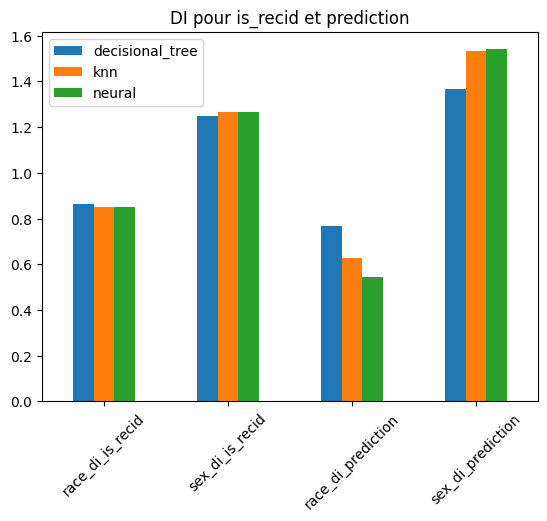

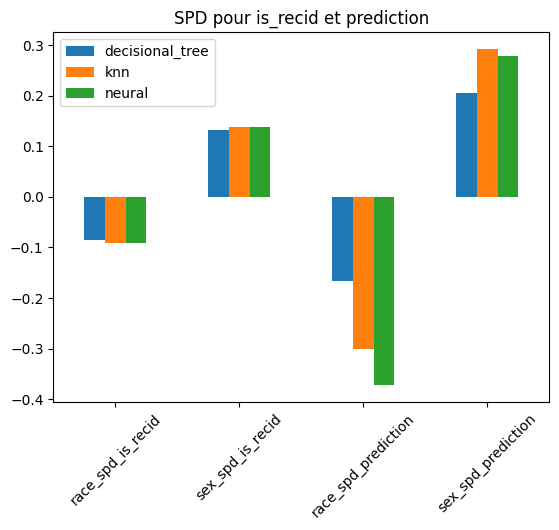

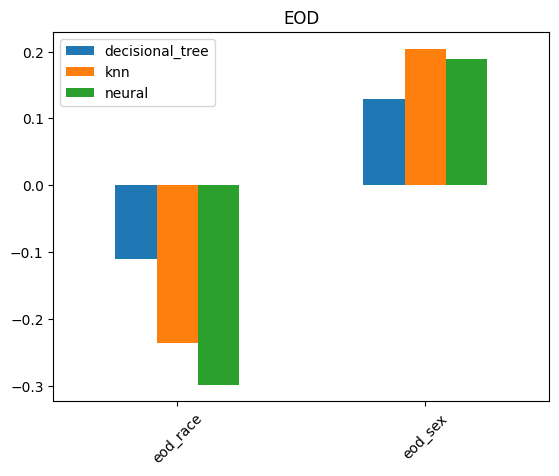

Jain's Fairness Index (JFI): 0.22066881769855748
Jain's Fairness Index (JFI): 0.48892166183463526
Jain's Fairness Index (JFI): 0.4952616110058495
Jain's Fairness Index (JFI): 0.48952398797397234


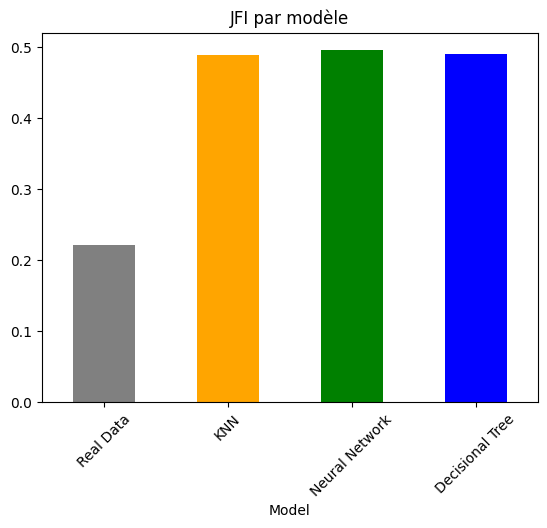

In [53]:
plot_di()
plot_spd()
plot_eod()
plot_jfi()

# Stats with prediction

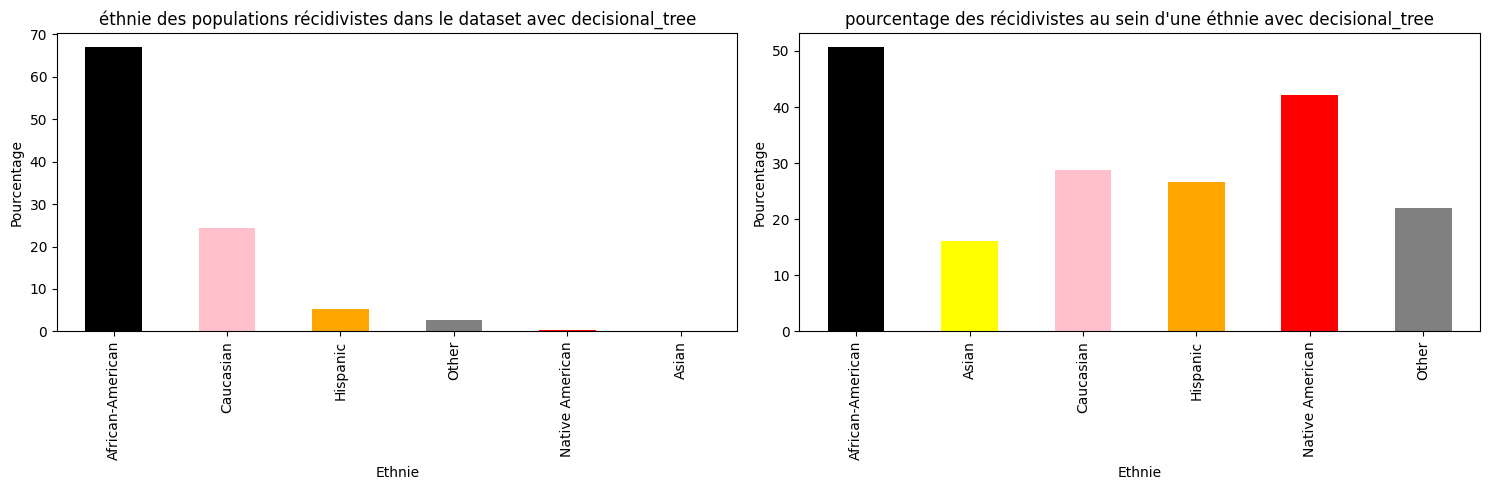

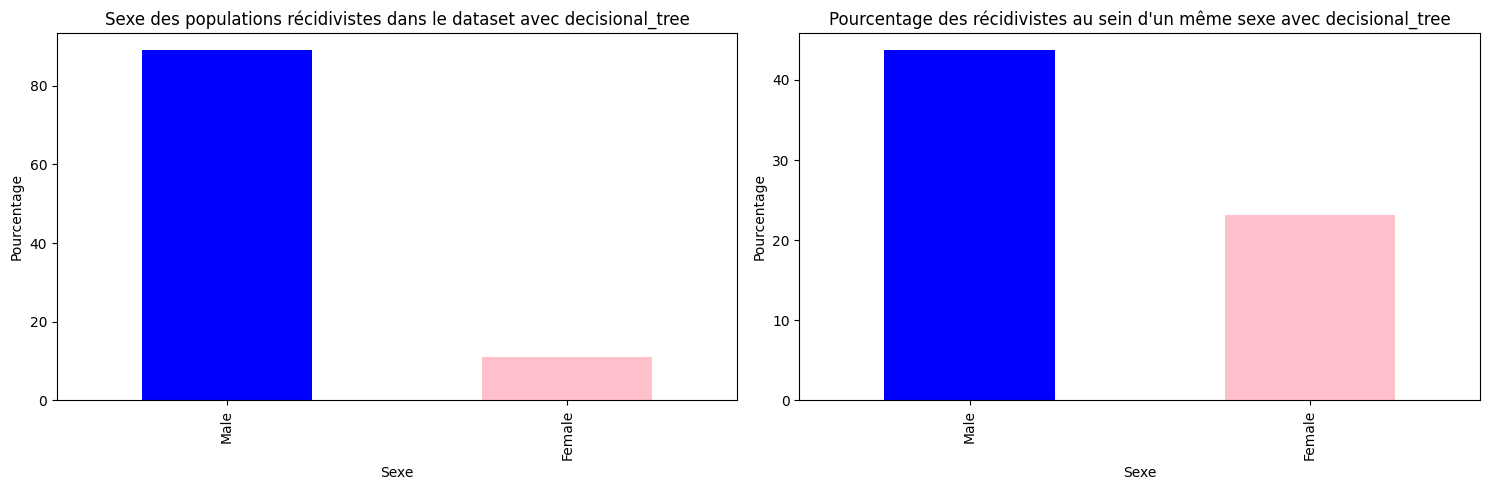

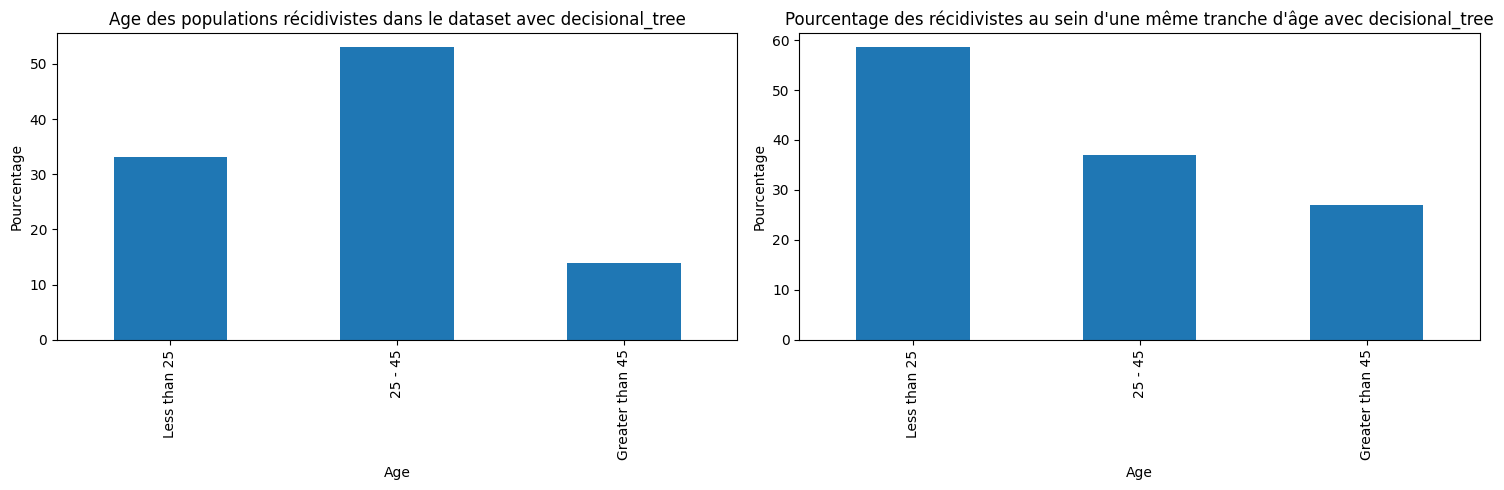

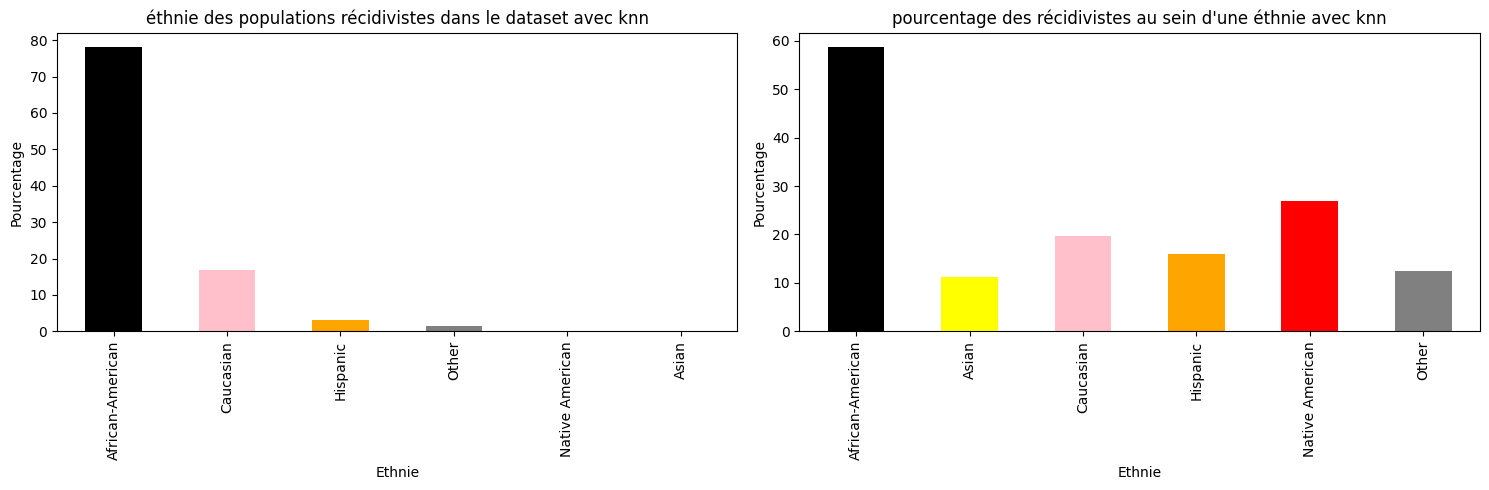

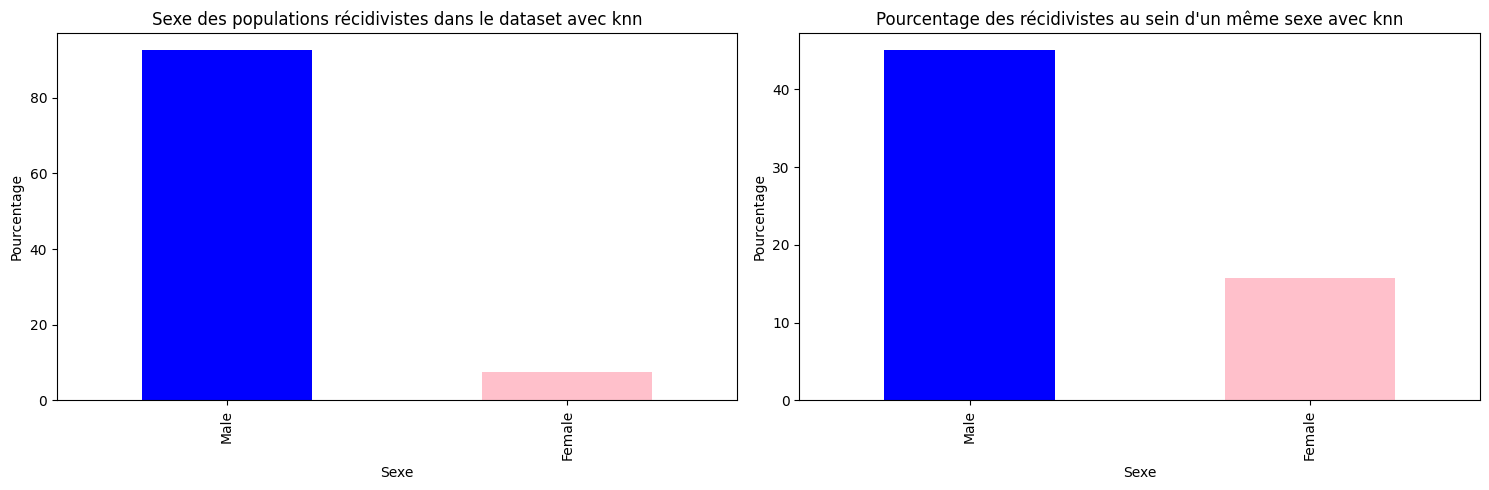

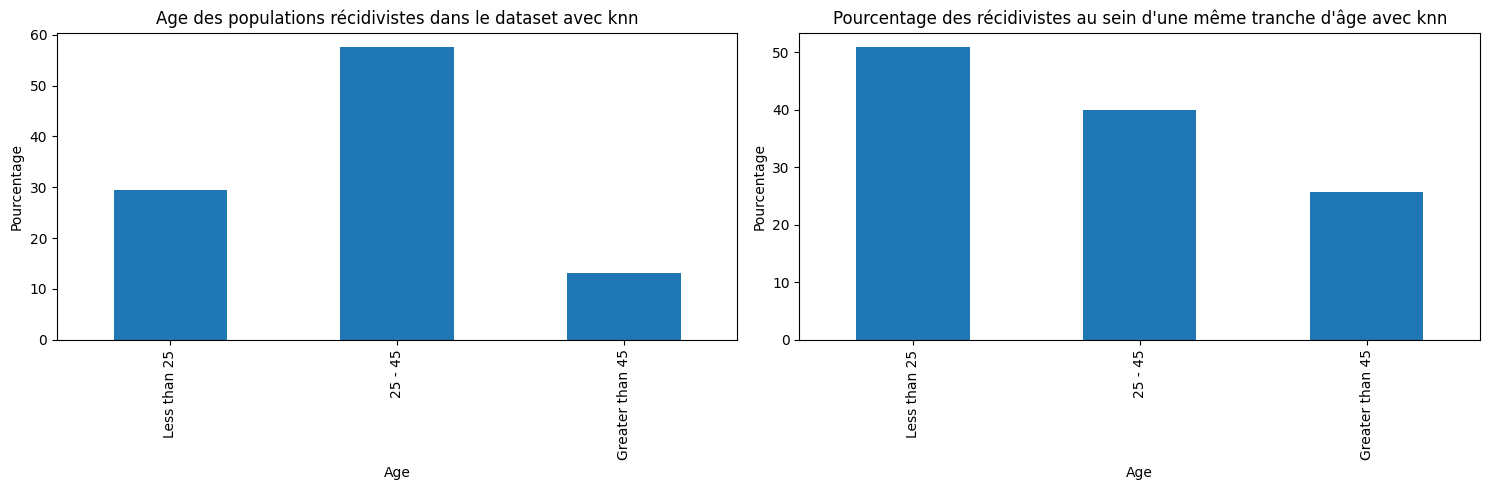

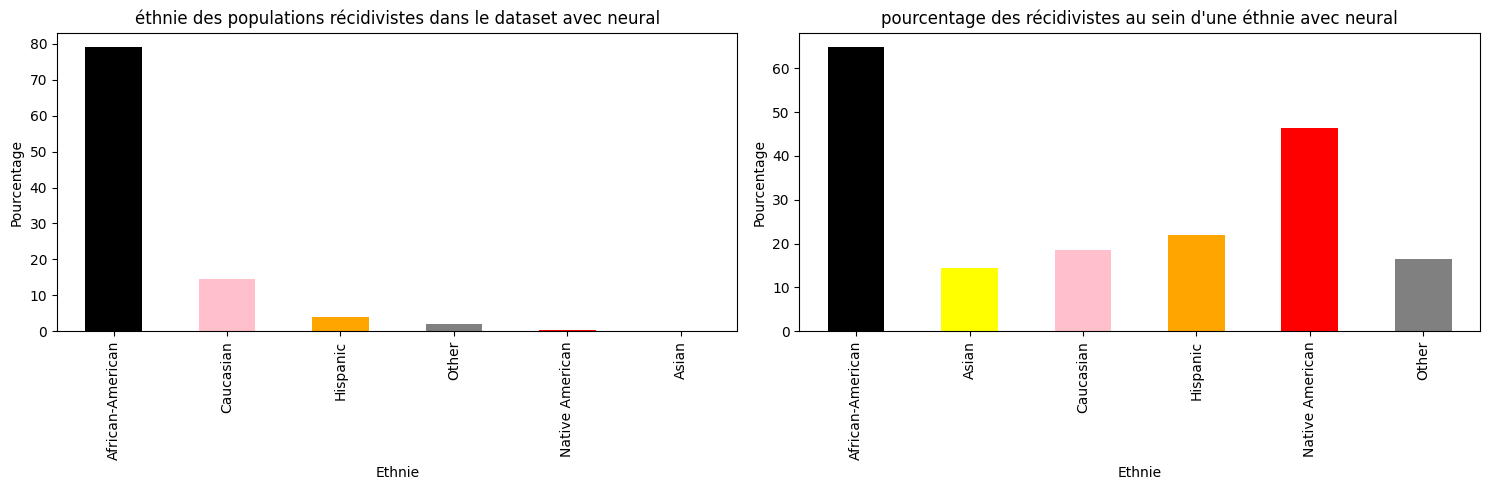

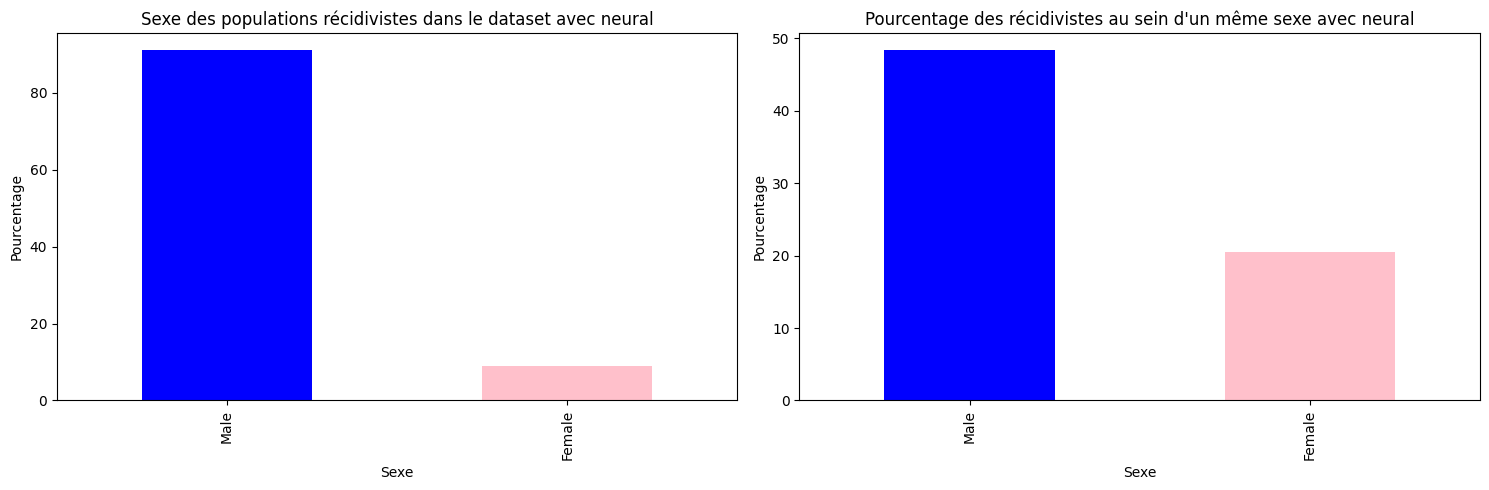

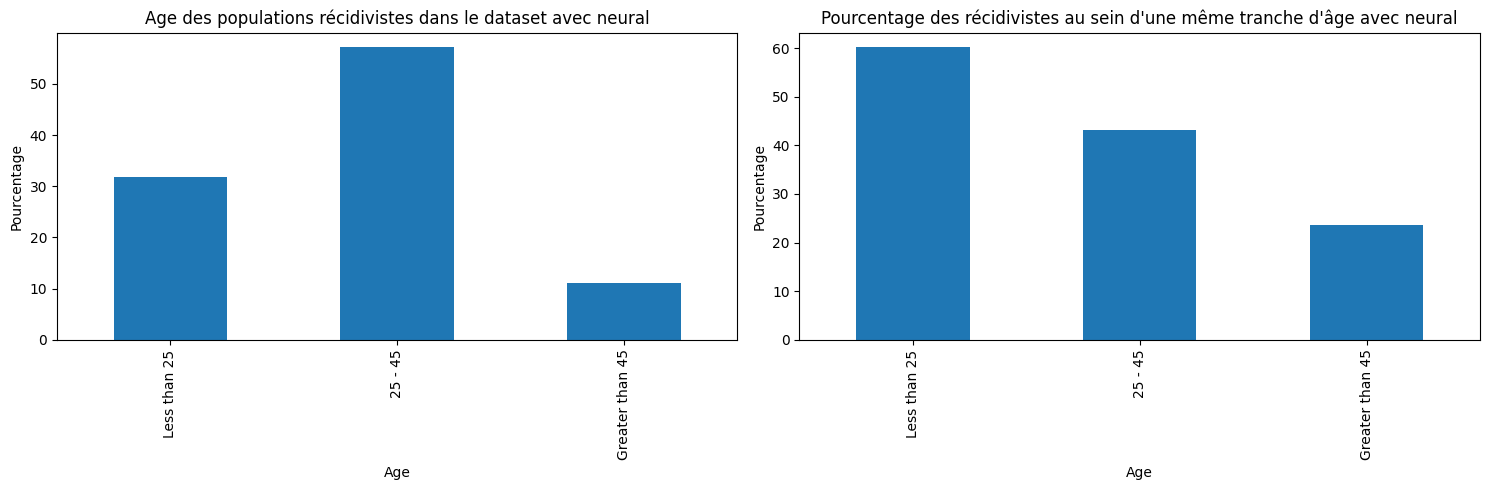

In [54]:
def get_stat_pred():
    models = ["decisional_tree","knn","neural"]
    for model in models:
        
        COLORS = {'African-American':'black','Caucasian':'pink','Hispanic':'orange','Other':'gray','Asian':'yellow','Native American':'red'}
        df = pd.read_csv(f"data/prediction_with_{model}.csv")
        df_eth = df[df['prediction'] == 1]['race']
        df_sex = df[df['prediction'] == 1]['sex']
        df_age = df[df['prediction'] == 1]['age_cat']
        
        
        
        #race
        fig, axs = plt.subplots(1, 2, figsize=(15, 5))

        value_counts_eth = df_eth.value_counts(normalize=True) * 100
        colors = [COLORS[eth] for eth in value_counts_eth.index]
        value_counts_eth.plot(kind='bar', color=colors, ax=axs[0])
        axs[0].set_xlabel('Ethnie')
        axs[0].set_ylabel('Pourcentage')
        axs[0].set_title(f"éthnie des populations récidivistes dans le dataset avec {model}")

        value_counts_eth = (df_eth.value_counts() / df['race'].value_counts())*100
        colors = [COLORS[eth] for eth in value_counts_eth.index]
        value_counts_eth.plot(kind='bar', color=colors, ax=axs[1])
        axs[1].set_xlabel('Ethnie')
        axs[1].set_ylabel('Pourcentage')
        axs[1].set_title(f"pourcentage des récidivistes au sein d'une éthnie avec {model}")

        plt.tight_layout()
        plt.show()
        
        #sex
        
        fig, axs = plt.subplots(1, 2, figsize=(15, 5))
        value_counts_sex = df_sex.value_counts(normalize=True) * 100
        colors = ['blue', 'pink']
        value_counts_sex.plot(kind='bar', color=colors, ax=axs[0])
        axs[0].set_xlabel('Sexe')
        axs[0].set_ylabel('Pourcentage')
        axs[0].set_title(f"Sexe des populations récidivistes dans le dataset avec {model}")
        
        
        value_counts_sex = (df_sex.value_counts() / df['sex'].value_counts())*100
        colors = ['blue','pink']
        value_counts_sex.plot(kind='bar', color = colors, ax=axs[1])
        axs[1].set_xlabel('Sexe')
        axs[1].set_ylabel('Pourcentage')
        axs[1].set_title(f"Pourcentage des récidivistes au sein d'un même sexe avec {model}")
        
        plt.tight_layout()
        plt.show()
        
        #age_cat
        
        
        fig, axs = plt.subplots(1, 2, figsize=(15, 5))
        
        order = ["Less than 25", "25 - 45", "Greater than 45"]
        value_counts_age = df_age.value_counts(normalize=True).reindex(order) * 100
        value_counts_age.plot(kind='bar', ax=axs[0])
        axs[0].set_xlabel('Age')
        axs[0].set_ylabel('Pourcentage')
        axs[0].set_title(f"Age des populations récidivistes dans le dataset avec {model}")
        
        value_counts_age = (df_age.value_counts() / df['age_cat'].value_counts()).reindex(order)*100
        value_counts_age.plot(kind='bar', ax=axs[1])
        axs[1].set_xlabel('Age')
        axs[1].set_ylabel('Pourcentage')
        axs[1].set_title(f"Pourcentage des récidivistes au sein d'une même tranche d'âge avec {model}")
        
        plt.tight_layout()
        plt.show()
get_stat_pred()